In [9]:
import pandas as pd
df_fb = pd.read_csv(r"D:\ML PROJECTS\finaltics ml projects\facebook-live-sellers-analysis\Facebook Dataset\Facebook_Marketplace_data.csv")
df_fb.info()
df_fb.head()
df_fb.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
unique,NaN,4,6913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,photo,3/20/2018 1:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4288,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3525.500000,NaN,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,NaN,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,NaN,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,NaN,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,NaN,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [10]:
# Drop completely empty columns
df_fb = df_fb.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])

# Convert 'status_published' to datetime format
df_fb['status_published'] = pd.to_datetime(df_fb['status_published'], errors='coerce')

# Extract time features
df_fb['publish_hour'] = df_fb['status_published'].dt.hour
df_fb['publish_day'] = df_fb['status_published'].dt.day
df_fb['publish_weekday'] = df_fb['status_published'].dt.day_name()

# Preview the updates
df_fb[['status_published', 'publish_hour', 'publish_day', 'publish_weekday']].head()


,status_published,publish_hour,publish_day,publish_weekday
0,2018-04-22 06:00:00,6,22,Sunday
1,2018-04-21 22:45:00,22,21,Saturday
2,2018-04-21 06:17:00,6,21,Saturday
3,2018-04-21 02:29:00,2,21,Saturday
4,2018-04-18 03:22:00,3,18,Wednesday


In [12]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\yuvan\AppData\Local\Temp\ipykernel_24876\1746954235.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publish_hour', y='num_reactions', data=hourly_reactions, palette="viridis")


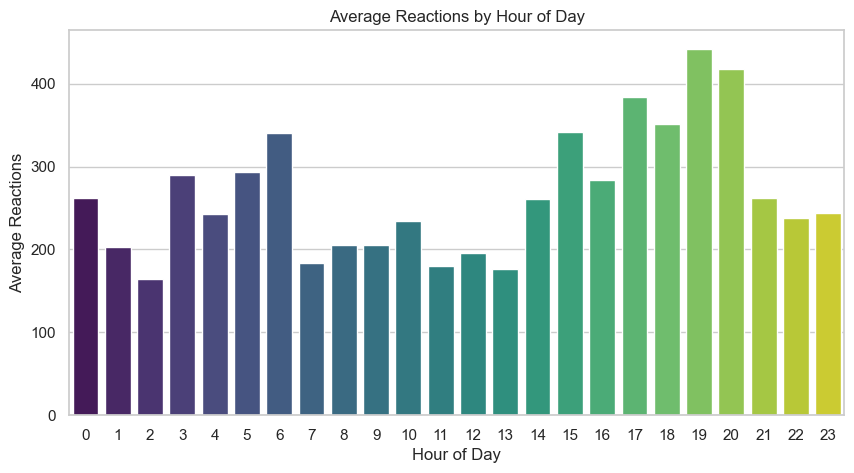

C:\Users\yuvan\AppData\Local\Temp\ipykernel_24876\1746954235.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publish_weekday', y='num_reactions', data=weekday_reactions, palette="coolwarm")


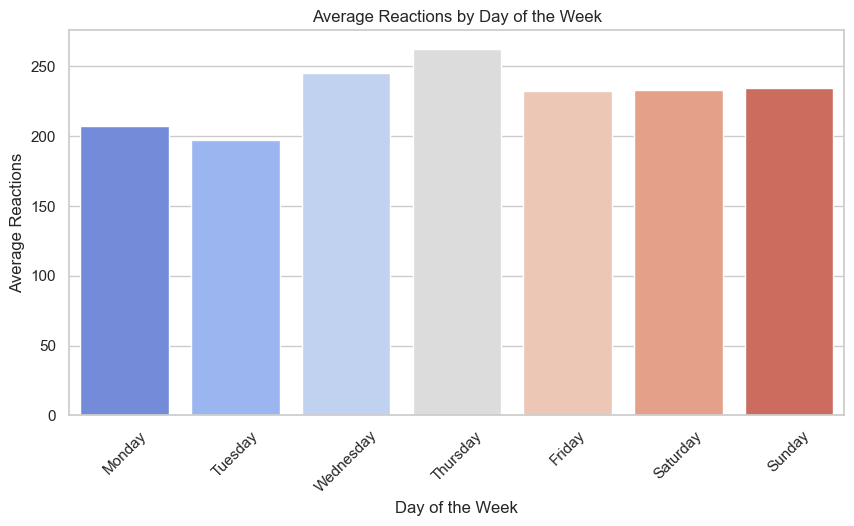

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Group by publish hour
hourly_reactions = df_fb.groupby('publish_hour')['num_reactions'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='publish_hour', y='num_reactions', data=hourly_reactions, palette="viridis")
plt.title('Average Reactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Reactions')
plt.show()

# Group by day of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_reactions = df_fb.groupby('publish_weekday')['num_reactions'].mean().reindex(weekday_order).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='publish_weekday', y='num_reactions', data=weekday_reactions, palette="coolwarm")
plt.title('Average Reactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Reactions')
plt.xticks(rotation=45)
plt.show()


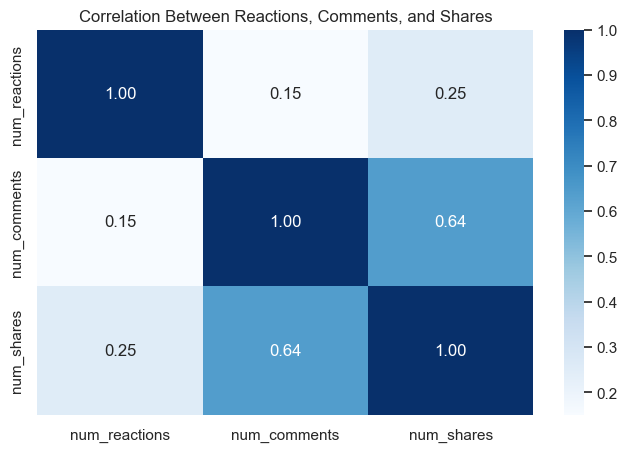

In [14]:
# Select engagement metrics
engagement = df_fb[['num_reactions', 'num_comments', 'num_shares']]

# Compute correlation matrix
correlation_matrix = engagement.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Between Reactions, Comments, and Shares')
plt.show()
